# Programmation et Modèle - Projet de fin de module

## Objectifs 
* Comprendre la notion de modèle et en voir des applications concrètes
* Comprendre l'intuition derrière les formules et voir comment les utiliser
* Assimiler et appliquer les notions de bases de programmation à ces modèles: variables, if, for, while, fonctions, classes
* Interpréter les résultats des simulations numériques

## Sujet
Le sujet est divisé en deux parties :
* La première partie porte sur le modèle S.I.R. (Susceptible, Infecté, Rétabli) utilisé pour simuler l'augmentation du nombre de cas d'une maladie infectieuse.  
* La deuxième partie porte sur la simulation d'une forêt via une approche dite "individu centrée". On modélisera la croissance des arbres individuellement grâce aux classes Python. Puis on s'attachera à modéliser une forêt entière. 

## Installation

Si matplotlib n'est pas déjà installé dans votre environnement Python : executer la ligne de code ci-dessous puis redémarrer le kernel en cliquant sur 'Kernel -> Restart' (ou en français 'Noyaux -> Redémarrer')

In [20]:
%pip install matplotlib numpy random


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement random
ERROR: No matching distribution found for random


## Première partie : le modèle SIR / 10 pts

### Objectifs de cette partie : 
* Comprendre et utiliser le concept de modèle compartimental
* Réutiliser les instructions de bases de Python pour simuler ce type de modèle 

Le modèle SIR est un modèle compartimentale utilisé en épidémiologie. Les modèles compartimentaux ont notamment été utilisé pour simuler la diffusion de maladie au sein d'une population comme celle du SIDA ou de la grippe espagnole. Le modèle SIR (Susceptible, Infecté, Rétabli) est une version très simplifié de ce qui est utilisé actuellement mais représente un bon aperçu pratique.

En classe, nous avons déjà abordé un exemple de modèle compartimentale avec les matrices des Leslie : l'idée est de trier les individues d'une population en classe (dans l'exemple vu en classe, il s'agit de 'enfant', 'juvénile' et 'adulte') et d'établir des règles de transition entre ces différents classes. La 'matrice de Leslie' était un exemple de transition entre ces différentes classes. 

Dans le cas du modèle SIR, la population est divisée en trois catégories : 
* les gens suceptibles de tomber malades: on note 'S' le nombre de gens dans cette catégorie
* les gens infectés: on note 'I' le nombre de gens infécté
* les gens rétablit, qui ne sont théoriquement plus susceptible de tomber malades. On note 'R' le nombre de gens dans cette catégorie

L'image ci-dessous représente le modèle SIR. Le paramètre $\beta$ représente le taux d'infection de la maladie, c'est-à-dire à quelle vitesse la maladie se propage. Le paramètre $\gamma$ représente le taux de guérison. 

![alt text](https://www.static.inrae.fr/cdn/ff/ev-ThAHoxG6uI7dmSE5wQzJIbNzg1s-RONb1VoWmLBA/1589292143/public/png/mod%C3%A9lisation%20%C3%A9pid%C3%A9mio%20figure%202%20%28mod%C3%A8le%20SIR%29.png "Croissance Arbre")

### Question 1 : l'intuition derrière le modèle / 2 pts
On se place dans le cas dit de "départ", c'est-à-dire lors de l'apparition de la maladie. A cet instant, il existe de nombreux cas susceptibles (S est grand), peu de cas infecté (I est faible) et aucun rétablit (R est nul). Essayez de vous projeter : **comment est suceptible d'évoluer les trois variables S, I et R avec le temps ? Essayez ensuite de présenter différents scénarios en fonction de la force d'infection de l'épidémie : que se passerait-il si la maladie était très contagieuse ou dans le cas contraire ?**

Votre réponse ici: 

-l'évolution des 3 variables S, I et R en fonction du temp: 
--------------------------------------------------------------------------------
       * à t= 0: soit I(0), S(0) et R(0) ou I0 S0 et R0 : 
                S0 représente l'effectif des individus de la population initiale infecté, ainsi que le nombre d'individus infecté est à bas niveau et aucuns individus rétablis (= 0) pour le moment.
                
        * à t > 0 : on peut dire que L’effectif de la population saine (S) diminue avec le temp, mais en même temp on aura une augmentation des individus infectés ( on peut le prévoir car il dépend du contact entre les sains et les contaminés) il va augmenter à un certins seuil pour qu'il diminue ensuite, aussi en meme temp, on va observer une croissance de la variable R ou des individus en état de rétablissement avec le temp, car on avait déjà des individus contaminés qui passent au compartiment rétablis. par contre pour R, on peut observé une augmenation qui continue avce le temp contrairement aux autre variables. 
        
-les differents scénarios possible en fonction de la forçe d'infection : 
--------------------------------------------------------------------------------------------------

        >> si la maladie est trés contagieuse : donc une force d'infection très haute : dans ce scénarios, on peut dire que le nombres d'individus infecté est vraiment trop élevé et avec le temp il va diminué après car il restera aucun individus a infecté dans la population, cela influence sur la variable S (sains), cette dernière elle va chuté brutalement ( à a un point ou on aura aucun individus sains), par contre pour la variable R (rétablies) elle augmente toujours avec le temp ( logiquement car les individus infecté seront rétablis)
         
        >> si la maladie est moyennement contagieuse : dans ce cas-là, le nombre d'infecté va passer à un certain seuil et diminue ensuite, en revanche les S( sains) vont diminue lentement avec le temp, et R augmente avec le temp.
        
        >> si la maladie n'est pas contagieuse : on aura un effectif d'individus sains S trop élevé au départ, qui va diminue trop lentement, cependant les individus infectés seront à bas niveau au début, augmente mais trop lentement ensuite vont diminue
       { bien évidement si on aura  aucun infecté == aucun malade= pas de rétablissement == les cas sains S  ne vont pas exister ( le modèle n'est plus)}




### Question 2 : compréhension des équations / 1 pts
On s'intéresse, dans un premier temps, à l'évolution du nombre d'infecté seulement, réprésenté par la variable 'I'. Si l'on suppose que la population totale est de taille infinie alors le nombre d'infecté va croire selon l'équation suivante: $\frac{dI}{dt}=(\beta - \gamma) I$, où $\beta$ est le taux d'infection et $\gamma$ le taux de rétablissement. **Comment va évoluer le nombre d'infecté si $\beta > \gamma$ ? Et dans le cas contraire ?**

Votre réponse ici:

si j'utilise un code qui me permettra de comprendre cette évolution : : 

       ( logiquement pour étudie une évolution d'une catégorie exemple de 'I' je devrais utiliser une variation ( une dérivé) mais dans mon cas j'ai fais ce code seulment pour prouvé ce qui ce passe si en varie l'uns des parametres beta ou gamma.on peut faire varie nos valeurs pour avoir les resultats.)
       
       
def infecter(i,beta,gamma):
    i = (beta-gamma)*i
    return i
print(" cas beta > gamma",infecter(20,0.5,0.2)) >>>> resultat : 0.6


def infecter(i,beta,gamma):
    i = (beta-gamma)*i
    return i
print("cas ou beta <  gamma",infecter(20,0.1,0.4)) >>>> resultat : -6.000000000000001    



- on va voir que dans le cas ou 𝛽>𝛾 : l'évolution du nombre d'individus infecté va augmenter dans le temp, enfin cela s'explique par l'augmenation du taux d'infection 𝛽 ( augmentation du contact entre les sains et les infectant)



- par contre dans le cas contraire 𝛽< 𝛾 : l'évolution du nombre d'individus infecté va diminue ( car 𝛾 représente le taux de rétablissement ou de guérison des individus infectés == beaucoup plus d'individus en rétablissement)



In [3]:
def infecter(i,beta,gamma):
    i = (beta-gamma)*i
    return i
print(" cas beta > gamma",infecter(20,0.5,0.2))

def infecter(i,beta,gamma):
    i = (beta-gamma)*i
    return i
print("cas ou beta <  gamma",infecter(20,0.1,0.4))

 cas beta > gamma 6.0
cas ou beta <  gamma -6.000000000000001


### Question 3 : tracer de l'évolution du nombre d'infecté / 2.5 + 0.5 pts
Dans l'équation précédente, on place généralement le paramètre $\gamma$ en facteur dans la parenthèse de droite et on obtient l'équation suivante : $\frac{dI(t)}{dt} = \gamma (R_{0} - 1) I(t)$, où $R_{0}$ est le tristement célèbre 'nombre de reproduction de base' de la maladie. On observe donc bien ici que lorsque $R_{0}$ dépasse le seuil critique de 1 le nombre d'infecté va augmenter et diminuer dans le cas contraire.

Le but de cette question est de coder une fonction qui 'trace' l'évolution du nombre d'infecté en fonction du temps. 

Rappel : comme vu en classe, l'équation précédente peut être approximée de la manière suivante :

$\frac{I(t+dt) - I(t)}{dt} = \gamma (R_{0} - 1) I(t)$

Ce qui peut être réécrit de la sorte :

$I(t+dt) = I(t) + \gamma (R_{0} - 1) I(t) dt$

**Ecrire une fonction notée *infect* qui prend en paramètre d'entrée:**
* *$I_0$*, le nombre de cas initiaux,
* *gamma*, le taux de guérison, 
* *$R_0$*, le nombre de reproduction de base,
* *dt*, un petit nombre typiquement 0.1 représentant le pas d'avancement dans l'équation précédente,
* *nb_pas*, le nombre de pas effectués.

**Cette fonction renverra deux listes :**
* une liste t contenant la liste des différents instants observés (typiquement : [0,dt,2dt,3dt, ...])
* une liste $I$ contenant le nombre d'infectés à chacun de ces instants.

([0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.7000000000000

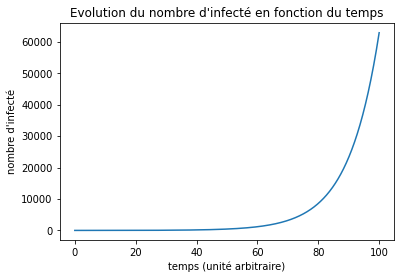

In [4]:
def infect(I0, gamma, R0, dt, nb_pas):
    t = [0]
    I = [I0]
    for i in range(nb_pas):
        t += [dt * (i+1)]
        I+= [I[-1] + gamma*(R0-1)*I[-1]*dt]

    return  t,I

print(infect(I0=3,gamma=0.1,R0=2,dt=0.1,nb_pas=1000)) #juste pour que je vois l'évolution en chiffres

# test de la fonction précédente
import matplotlib.pyplot as plt

t, I = infect(I0=3,gamma=0.1,R0=2,dt=0.1,nb_pas=1000)
plt.plot(t,I)
plt.xlabel('temps (unité arbitraire)')
plt.ylabel('nombre d\'infecté')
plt.title('Evolution du nombre d\'infecté en fonction du temps')
plt.show()

**Quelles observations pouvez vous faire concernant ce modèle ? Quelles sont ses limitations ? / 0.5 pts**

Votre réponse ici:

Observation : 
- on peut dire que c'est un modèle mathématique discreptif et continue (si on reste dans des petit effectif cela donne des courbe en expotentiel)
- la fonction est les individus infecté, la variable d'entre est le temp(intervalle de temp)
- ce modèle decrit les population de grande taille aussi, 
- ce modèle nous permet d'avoir une courbe continue, car dans notre cas le virus par exemple il trouve toujours des individus a infectés dans la population qui est infinie dans le quel on voit que le nombre d'individus infecté augmente avec le temp sans diminution == augmentation infinie d'individus infectés

Les limitation de ce modèle : 
traitement des donnée infinie sans limitation
un modèle moins réelle ( moins concret)
tout le monde tombent malades, alors que c'est faux 


### Question 4 : compréhension des equations du 'vrai' modèle SIR / 1 pts

Vous l'aurez peut être deviné : le modèle SIR est en réalité plus complexe que cela. Voici les trois équations le décrivant:

$\frac{dS(t)}{dt}=-\frac{\beta I(t) S(t)}{N}$

$\frac{dI(t)}{dt}=\frac{\beta I(t) S(t)}{N} - \gamma I(t)$

$\frac{dR(t)}{dt}=\gamma I(t)$

Dans cette série d'équations:
* $S$ est le nombre de cas suceptibles d'être infecté
* $I$ est le nombre d'infecté
* $R$ est le nombre de rétabli
* $\beta$ est le taux de contact
* $\gamma$ est le taux de rétablissement
* $N$ la taille de la population, $N = S + I + R$

**Décrivez chacune de ces équations: comment varient les variables les unes par rapport aux autres ? Pour répondre à cette question vous pourrez vous aider de la courbe ci-dessous, traçant l'évolution des 3 variables S, I et R en fonction du temps.**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/SIR_trajectory.png/600px-SIR_trajectory.png "Croissance Arbre")


* Discréption des équation:
************************
𝑑𝑆(𝑡)/𝑑𝑡=−𝛽𝐼(𝑡)𝑆(𝑡)/𝑁 : c'est l'évolution ou la variation des individus de la catégories 'S' en fonction du temp, qui ce traduit par une dérivé, dans ce cas on voit une diminution (-) des S par unité de temp, qui passe dans la catégories I et qui dépend du paramétre beta (taux de contact)  

𝑑𝐼(𝑡)/𝑑𝑡=𝛽𝐼(𝑡)𝑆(𝑡)/𝑁−𝛾𝐼(𝑡) : c'est la variation des individus inféctées donc le nombre des nouveau infectées mais on soustrait les individus qui passe en rétablis R, donc logiquement ils correspondent aux individus infecté qui infecte les S multiplié par beta puis divisé par la N
 
𝑑𝑅(𝑡)/𝑑𝑡=𝛾𝐼(𝑡) : une variation des individus rétablis qui correspond aux individus qui ont dépassé le temp de maldie et don ne sont plus malade, et qui sont passé de infecté a rétablis 

* comment varient les variables les unes par rapport aux autres ?
***************************************************************
-pour commencer au début on a la totalité de l’effectif sains qui représente la variable 'S' 
-puis au début de l’épidémie le virus se propage, là on remarque que la variable ‘S’ diminue progressivement mais parce que la variable ‘I’ augmente en meme temp en fonction du nombre de contacte contaminants entre les ‘I’ et les ‘ S’ jusqu’à ce que la moitie de la population ait été infectée cela correspond sur le graphe a la valeur max de ‘I’ qui aprés diminue à sont tour, 
-voir ailleurs de la variation de ces  2 variable 'S' et 'I', on la variable'R' qui varient elle aussi en fonction de ces deux derneire ,car celle la commence à augmenter juste après que les individus passe de sain a infecté ensuite à rétablis, puis elle continue à augmenter jusqu’à atteindre l’effectif totale de la population 

(d'apres la lecture du graphe et si l'experience continue peut etre on peut faire réference au modèle de Lotka-Volterra)



### Question 5 : mise en place du modèle et tracé des courbes en Python / 2.5 + 0.5 pts

Cette dernière question est en quelque sorte le coeur de cette première partie : le but est de tracer l'évolution du nombre de cas avec différentes conditions de départ et d'observer les changements induits. 

On rappelle que les trois équations précédentes peuvent être réécritent de la sorte :

$S(t+dt)=S(t)-\frac{\beta I(t) S(t)}{N}dt$

$I(t+dt)=I(t)+(\frac{\beta I(t) S(t)}{N} - \gamma I(t))dt$

$R(t+dt)=R(t)+\gamma I(t)dt$

**Ecrivez une fonction nommée *sir* qui prend en entrée :**
* beta, le taux d'infection
* gamma, le taux de rétablissement
* s0, le nombre de cas de cas suceptible au départ
* i0, le nombre d'infecté au départ
* r0, le nombre de rétablit au départ : variable mise à zero dans la plupart des cas
* dt, la taille du pas
* nb_pas, le nombre de pas (= de répétition) de l'algorithme

**Et qui renvoie :**
* une liste t contenant la liste des différents instants observés (typiquement : [0,dt,2dt,3dt, ...])
* une liste $S$ contentant le nombre de personnes susceptibles d'être infectées par la maladie.
* une liste $I$ contenant le nombre d'infectés à chacun de ces instants.
* une liste $R$ contenant le nombre de personne rétablit à chacun de ces instants.

In [5]:
def sir(beta,gamma,s0,i0,r0,nbof_step,dt):
    S = [s0]
    I = [i0]
    R = [r0]
    N = s0+i0+r0
    t = [0]
    
    for i in range(nbof_step):
        t += [dt * (i+1)]
        S += [S[-1]-(((beta*I[-1]*S[-1])/N)*dt)]
        I += [I[-1]+(((beta*I[-1]*S[-1])/N)-(gamma*I[-1]))*dt]
        R += [R[-1] +((gamma*I[-1])*dt)]    
      
    return t,S,I,R  
print(sir(beta=2,gamma=1,s0=300,i0=1,r0=0,nbof_step=500,dt=0.1))

([0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.7000000000000

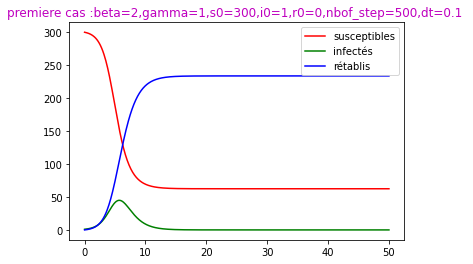

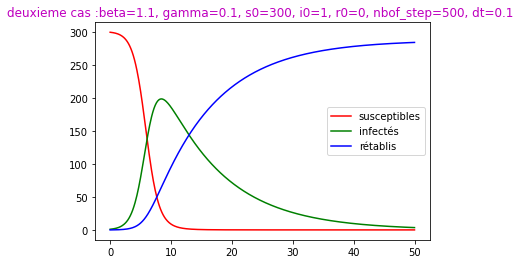

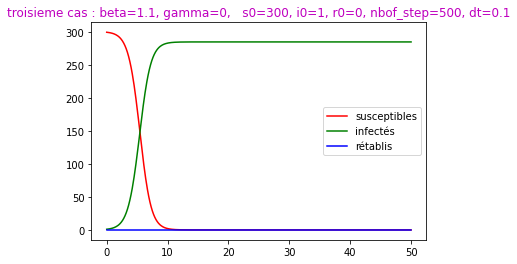

In [6]:
import matplotlib.pyplot as plt

t,s,i,r = sir(beta=2,gamma=1,s0=300,i0=1,r0=0,nbof_step=500,dt=0.1)
plt.title('premiere cas :beta=2,gamma=1,s0=300,i0=1,r0=0,nbof_step=500,dt=0.1 ', color='m')
plt.plot(t,s,color='red',label='susceptibles')
plt.plot(t,i,color='green',label='infectés')
plt.plot(t,r,color='blue',label='rétablis')
plt.legend()
plt.show()
#----------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

t,s,i,r = sir(beta=1.1, gamma=0.1, s0=300, i0=1, r0=0, nbof_step=500, dt=0.1)
plt.title('deuxieme cas :beta=1.1, gamma=0.1, s0=300, i0=1, r0=0, nbof_step=500, dt=0.1 ', color='m')
plt.plot(t,s,color='red',label='susceptibles')
plt.plot(t,i,color='green',label='infectés')
plt.plot(t,r,color='blue',label='rétablis')
plt.legend()
plt.show()
#------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt

t,s,i,r = sir(beta=1.1, gamma=0,   s0=300, i0=1, r0=0, nbof_step=500, dt=0.1)
plt.title('troisieme cas : beta=1.1, gamma=0,   s0=300, i0=1, r0=0, nbof_step=500, dt=0.1', color='m')
plt.plot(t,s,color='red',label='susceptibles')
plt.plot(t,i,color='green',label='infectés')
plt.plot(t,r,color='blue',label='rétablis')
plt.legend()
plt.show()

**Tester la fonction précédente avec les valeurs suivantes et expliquer la forme des courbes : / 0.5 pts**
```python
beta=2,   gamma=1,   s0=300, i0=1, r0=0, nbof_step=500, dt=0.1
beta=1.1, gamma=0.1, s0=300, i0=1, r0=0, nbof_step=500, dt=0.1
beta=1.1, gamma=0,   s0=300, i0=1, r0=0, nbof_step=500, dt=0.1
```

* cas 1 : (beta=2,   gamma=1,   s0=300, i0=1, r0=0, nbof_step=500, dt=0.1)
 premièrement le paramétre beta est > gamma, cela permet d'avoir un taux d'infection ou de contacte plus rapide dans le temp, ainsi on voit que la courbe 'S'diminue  jusqu'a ce stabilisée (un peu moins de 100) et cela avec l'accroissement de 'I' qui atteint un certain seuil (pas plus de 50)puis diminue vraiment, en même temp on a la courbe 'R' qui démarre juste après les première infection, augmente ensuite, pour atteindre une certaines valeur( mais pas l’effectif totale car peut être y'avait des morts ou car le virus n' pas infecté un nombre trop élevé comme on le voit ici = 50 individus seulement ) une maladie pas trop contagieuse
 
* cas 2 :(beta=1.1, gamma=0.1, s0=300, i0=1, r0=0, nbof_step=500, dt=0.1):
on a le paramétre beta qui toujours supérieurs au seuil 1, et gamma diminue au 0.1, cela permet d'atteindre un taux de contamination trop élevé qui atteint les 200 individus en 10 jours puis diminue progressivement, et une chute des individus sains a des niveau trop bas (=0), en même temp une courbe R qui montre les individus rétablis qui augmente avec le temp jusqu'à atteindre des chiffres élevés car on a infecté un nombre élevé de sains au début ( maladie contagieuse).

* cas 3 :(beta=1.1, gamma=0,   s0=300, i0=1, r0=0, nbof_step=500, dt=0.1):
dans ce cas le paramétre gamma est totalement nul, et beta est superieure au seuil 1, absence totale de guiroson ( gamma =0) cela nous permet d'avoir une courbe de 'S'qui diminue completement et une courbe 'I'qui attenit le max de la population, donc infection totale de la population, par contre absence de la courbe R, car gamma = taux de guirison= 0 = pas de rétablisement. 


## Deuxième partie : l'évolution d'une forêt / 10 pts

**Objectif de cette partie :**

* Construire un programme de simulation de l'évolution d'une forêt.


Un modèle de simulation « individu centré » est basé sur l'idée que chaque entité à représenter est décrite individuellement. Dans le cadre de ce projet, vous devez construire un modèle de ce type qui décrit sur un pas de temps annuel l'évolution d'un peuplement forestier. Une classe Foret forestier sera ici défini comme un ensemble homogène d'objets Arbre, où chaque Arbre aura son instance propre, et des valeurs d'attributs qui lui seront spécifiques. Tous les Arbre se caractériseront notamment par :
- une méthode allométrique qui permet d'estimer la taille de la couronne de l'arbre en fonction du diamètre de son tronc ;
- une méthode croissance qui permet de calculer l'augmentation de taille du diamètre du tronc en un an.

### Question 6 : construire une classe Arbre / 3.5 pts

Construire la classe Arbre qui décrira les caractéristiques communes à tous les arbres.

Vos arbres seront caractérisés par les attributs suivants :
* un numero d’identification (int)
* son espèce (string)
* le diamètre de son tronc (float)
* un diamètre de tronc maximal (float)
* un paramètre alpha, parametrant la croissance de l'arbre (float)
* un paramètre beta, parametrant la croissance de l'arbre (float)
* un paramètre r, taux d’accroissement annuel de l’arbre (float)
* un paramètre R, rayon du houppier (float)

et devront comporter trois méthodes : 

* une méthode permettant d’afficher tous les attributs d’un Arbre donné 
* une méthode *allométrique* qui permet de calculer le rayon de la couronne d'un arbre (le houppier) en fonction du diamètre de son tronc grâce à la formule suivante : 

<center>$R = (\frac{D}{\alpha})^{\frac{1}{\beta}}$, </center>

* où 
    * R est le rayon du houppier (m)
    * D est le diamètre du tronc (cm)
    * $\alpha$=7.07
    * $\beta$=1.113
 
* une méthode *croissance* qui permet de calculer l'augmentation de taille du diamètre du tronc en un an et met à jour le nouveau diamètre D : 

<center>$\frac{dD}{dt}=\beta r D (1-\frac{D}{Dmax})^{\frac{1}{\beta}}$ </center>

* où
    * Dmax est le diamètre de tronc maximal

In [15]:
class Arbre:
    def __init__(self,num_identif,espece,diametre,diamet_tronc_maxim,alpha, beta, r):
        self.num_identi =num_identif
        self.espece = espece
        self.diametre = diametre
        self.diametre_maxim = diamet_tronc_maxim
        self.alpha = alpha
        self.beta = beta
        self.r = r
        self.R = self.ray_houp()

    #premeire méthode pour affiché les attributs.
    # def __str__(self):
    #     #return 'le numéro didentification est',(self.num_identi)," et son espece est l'",(self.espece),"\nalor que sont diametre du tronc initial fait :",self.diametre,"Cm",", et le diametre maximal est de : ",self.diametre_maxim,", avce un parametre de croissance de alpha : = ",self.alpha," et beta de  ",self.beta,"\net le taxu de croissance sera d'environ",self.r," et le rayon d'houppier fait",self.R
    #     return "le numéro didentification est :"+ str(self.num_identi) + " \nl'espece :"+ str(self.espece)+ "\nle diametre initial de l'arbre fait:"+ str(self.diametre)+"cm \nainsi le diametre maxim:" + str(self.diametre_maxim)+"Cm\nle prametre de croissance alpha est de :" + str(self.alpha)+"\net le parametre beta est de : " + str(self.beta)+ "\navec un taxu de croissance de :"+ str(self.r)+"\n l'houppier sera calculter plustard "

    def affiche(self):
        print("le numéro didentification est :"+ str(self.num_identi) + " \nl'espece :"+ str(self.espece)+ "\nle diametre initial de l'arbre fait:"+ str(self.diametre)+"cm \nainsi le diametre maxim:" + str(self.diametre_maxim)+"Cm\nle prametre de croissance alpha est de :" + str(self.alpha)+"\net le parametre beta est de : " + str(self.beta)+ "\navec un taux de croissance de :"+ str(self.r))

    #deuxime méthode pour calculer le rayon
    def ray_houp(self):
        R= (self.diametre/self.alpha)**(1/self.beta)
        return R

    #troisieme méthode pour calculer l'augmentation du diametre en un an seulement
    def croissance(self):
        diametre_nouveau = (self.beta*self.r*self.diametre)*((1-self.diametre/self.diametre_maxim)**(1/self.beta)) + self.diametre
        return diametre_nouveau




arbre1=Arbre(num_identif=2004,espece="arbus",diametre=50,diamet_tronc_maxim=100,alpha=7.07,beta=1.113,r=0.5)

print("- R du l'houppier fait ",arbre1.ray_houp(),"Cm")

print("-le nouveau diametre sera de :",arbre1.croissance(),"Cm")

- R du l'houppier fait  5.798263195445889 Cm
-le nouveau diametre sera de : 64.92684321323816 Cm


### Question 7 : simuler la croissance d'un Arbre / 0.5 pts

1. Instancier un Arbre grâce à la classe Arbre en lui donnant un nom et des valeurs d'attributs initiales que vous choisirez. 
2. Faire afficher les attributs de l'Arbre.
3. Faire croître l'Arbre pendant 20 ans et faire afficher les attributs de l'Arbre chaque année.

In [5]:
# Q1
arbre1=Arbre(num_identif=2004,espece="arbus",diametre=50,diamet_tronc_maxim=100,alpha=7.07,beta=1.113,r=0.5)

In [6]:
# Q2
arbre1.affiche()

le numéro didentification est :2004 
l'espece :arbus
le diametre initial de l'arbre fait:50cm 
ainsi le diametre maxim:100Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5


In [10]:
# Q3

def croitre_arbre(dt=1):
    d = [ arbre1.diametre ]

    for i in range(20):
        d+= [d[-1]+ ((arbre1.beta*arbre1.r*d[-1])*((1-(d[-1]/arbre1.diametre_maxim))**(1/arbre1.beta))*dt)]

    return  d

display(croitre_arbre())# j'ai utilisé display pour les afficher séparément

[50,
 64.92684321323816,
 79.02173786831789,
 89.83209978561557,
 96.24303260927661,
 99.05082471701,
 99.89033196681443,
 100.01211356418007,
 (99.99611913951892+0.005281888270986872j),
 (100.00257871891411-0.001952682754829768j),
 (99.99938727279593+0.0020797019536276844j),
 (100.00084091907827-0.0012024725596615688j),
 (99.99988266272268+0.00113656887167776j),
 (100.00038590793383-0.0008186355104571772j),
 (100.00000256970601+0.0007733150831720601j),
 (100.00022415380269-0.0006309702560968495j),
 (100.00004093977954+0.0006046425738232709j),
 (100.00015352392712-0.0005318240438064545j),
 (100.00005574026122+0.0005163844608350873j),
 (100.00011820882857-0.000475858051377537j),
 (100.00006227708084+0.0004665608866725354j)]

### Question 8 : créer une Forêt / 2.5 pts

Une forêt est un ensemble d'arbres. Pour simplifier une forêt ne stockera qu'une seule espèce d'Arbre. Créer un objet Foret avec l'attributs suivant :

* une liste d'Arbre (représentant la forêt)

et les méthodes suivantes :

* un constructeur initialisant cette liste
* une méthode qui affiche tous les attributs de tous les Arbres de la Foret

In [7]:
class Foret:
    # une Foret est essentiellement une liste d'arbre
    def __init__(self,
                 liste_arbre_init):  # contient une liste de la forme [arbre1, arbre2] où arbre1 et 2 sont des instances de la classe Arbre
        self.liste_arbre = liste_arbre_init

    def affiche(self):

        for i in range(len(self.liste_arbre)):
            print("_____________________________________")# je veux juste séparé entre ce que j'affiche 
            print(f"Arbre {i+1}")
            self.liste_arbre[i].affiche()  


### Question 9 : tester la classe et l'affichage / 0.5 pts

Instancier une Foret et faire appel à la méthode d'affichage.

In [8]:
""" 
si jai bien compris je devrais donnée a mes arbres ces proprietes, 
enfin on part du meme principe que les premeire partie de l'exercice, avec diametre iniial....
"""
espece="arbus"
alpha=7.07
beta=1.113
r=0.5
# donc j'utilsie la ce qui varie entre les arbres de ma Foret 
arbre1 =  Arbre(10, espece, 1, 3, alpha, beta, r)
arbre2 =  Arbre(20, espece, 2, 3, alpha, beta, r)

liste = [arbre1, arbre2]
foret1 = Foret(liste)
foret1.affiche()

_____________________________________
Arbre 1
le numéro didentification est :10 
l'espece :arbus
le diametre initial de l'arbre fait:1cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5
_____________________________________
Arbre 2
le numéro didentification est :20 
l'espece :arbus
le diametre initial de l'arbre fait:2cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5


### Question 10 : dynamiser votre forêt / 3 pts

Dans une forêt, les arbres croissent, certains meurent et des graines germent pour donner
naissance à de nouveaux arbres...

Dans ce programme de simulation, la mortalité et le recrutement des arbres sont des caractéristiques de notre foret. Le nombre d'arbres qui apparaissent / disparaissent dans la foret à
chaque pas de temps est aléatoire.

---
**Gestion des évéments aléatoires**

La génération d'un événement aléatoire dans un programme de simulation consiste à calculer une
valeur associée à cet événement comprise dans un intervalle défini (ex : la probabilité de mort de
l'arbre est comprise dans l'intervalle [0, 1]) , puis de comparer cette valeur à une valeur générée
aléatoirement. Si la valeur calculée est inférieure à la valeur aléatoire, alors l'événement se réalise, si la
valeur caculée est supérieure à la valeur aléatoire, alors l'événement ne se réalise pas.
Par exemple : la probabilité de mort d'un arbre est d'autant plus grande qu'il est agé (son age étant
estimé par la taille de son tronc). On peut définir une probabilité calculée de mortalité de l'arbre
comme une fonction du rapport de la taille de son tronc par rapport à la taille maximale du tronc. On
peut ensuite comparer la probablité calculée à une valeur aléatoire. 

![alt text](https://i.ibb.co/0sDQHkF/arbre-croissance.png "Croissance Arbre")

---


En Python, générer un nombre aléatoire est assez simple. Le code ci-dessous va afficher un nombre aleatoire entre 0 et 1 grâce au module Python nommé *random* ('aléatoire' en français):

```python
from random import random
print(random()) # la fonction random() renvoie un nombre compris entre 0 et 1 tiré aléatoirement
alea = random()
print(alea)
```
0. Comme la classe Foret, définie précédemment, va être modifiée ici, la copier-coller dans le bloc de code ci-dessous.

1. Créer une méthode mortalité dans votre classe Foret définie précédemment supprimant un Arbre avec les conditions suivantes :
    * La probabilité de voir un arbre mourir est une fonction de sa taille et est donné par la formule : $p_{mort} = (\frac{D}{D_{max}})^3$. Vous pourrez vous servir de cette formule et comparer la valeur obtenue avec un nombre tiré aléatoirement entre 0 et 1. Si ce nombre aléatoire est plus grand de $p_{mort}$ alors l'Arbre survit, dans le cas contraire, l'Arbre meure. On comprend bien ici que plus le temps passe, plus le diamètre de l'Arbre augmente et plus les chances de tiré un nombre plus petit que $p_{mort}$ augmente.
    * Si un arbre meure, l'éliminer de la forêt
2. Créer une fonction de recrutement dans votre Foret rajoutant un Arbre avec les conditions suivantes :
    * A chaque itération, la probabilité de voir apparaître un nouvel arbre est $p_{nvx} = \frac{1}{10}$ (même remarque que précédemment concernant les probabilités)
    * Si un nouvel arbre est créé, l'ajouter à la Foret
3. Créer une méthode simulation qui appelle successivement les méthodes mortalité, recrutement et croissance (des Arbres) de manière à modéliser la croissance de votre Foret sur une durée d'un an. 

4. Instancier une Foret et la faire croitre pendant 20 ans, à chaque itération faire afficher votre Foret grâce à la méthode définie à la question 8

In [9]:

# copier-coller votre classe Foret précedemment définie

from random import random

# votre code ici 
class Foret:
    def __init__(self, liste_arbre_init):  
        self.liste_arbre = liste_arbre_init

    def affiche(self):

        for i in range(len(self.liste_arbre)):
            print("_____________________________________")
            print(f"Arbre {i+1}")
            self.liste_arbre[i].affiche() 
    
    def get_max_id(self): # je vais l'utilsier pour que si je vai ajouter un arbre dans ma Foret elle devrait avoir un num_d'identification, donc il faut que j'attribue au nouveau arbres d'autre identifiants
        ids_list =[]
        for arbre in self.liste_arbre:
            ids_list+= [arbre.num_identi]
        return max(ids_list)
    
    
    def mortalite(self): # je suppose que le cas égalité l'abre reste vivant
        for i in range(len(self.liste_arbre)):
            aleatoire = random()
            arbre_courant = self.liste_arbre[i]
            
            P_mort = (arbre_courant.diametre/arbre_courant.diametre_maxim)**3
            if P_mort > aleatoire:
                del self.liste_arbre[i]
                    
                
    def recrute(self):
        # ajoute aléatoirement un arbre à la liste d'arbre si 'aleatoire' est inférieur à 1/10
        seuil = 1/10
        
        for i in range(len(self.liste_arbre)):
            aleatoire = random()
            max_id = self.get_max_id()
            if aleatoire < seuil:
                self.liste_arbre += [Arbre(max_id+1, "arbus", 0.5, 3, 7.07, 1.113, 0.5)]
    
    
espece="arbus"
alpha=7.07
beta=1.113
r=0.5

arbre1 =  Arbre(10, espece, 1, 3, alpha, beta, r)
arbre2 =  Arbre(20, espece, 2, 3, alpha, beta, r)

liste = [arbre1, arbre2]
foret1 = Foret(liste)
print("Avant le test de mortalité")
foret1.affiche()
foret1.mortalite()
print("\n\nAprès le test de mortalité")
foret1.affiche()

Avant le test de mortalité
_____________________________________
Arbre 1
le numéro didentification est :10 
l'espece :arbus
le diametre initial de l'arbre fait:1cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5
_____________________________________
Arbre 2
le numéro didentification est :20 
l'espece :arbus
le diametre initial de l'arbre fait:2cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5


Après le test de mortalité
_____________________________________
Arbre 1
le numéro didentification est :10 
l'espece :arbus
le diametre initial de l'arbre fait:1cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5
_____________________________________
Arbre 2
le numéro didentification est :20 
l'espece :arbus
l

In [10]:
espece="arbus"
alpha=7.07
beta=1.113
r=0.5

arbre1 =  Arbre(10, espece, 1, 3, alpha, beta, r)
arbre2 =  Arbre(20, espece, 2, 3, alpha, beta, r)

liste = [arbre1, arbre2]
foret1 = Foret(liste)
print("Avant le test de recrutement on avait: : ")
foret1.affiche()
foret1.recrute()
print("\n\nAprès le test de le recrutement:")
foret1.affiche()

Avant le test de recrutement on avait: : 
_____________________________________
Arbre 1
le numéro didentification est :10 
l'espece :arbus
le diametre initial de l'arbre fait:1cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5
_____________________________________
Arbre 2
le numéro didentification est :20 
l'espece :arbus
le diametre initial de l'arbre fait:2cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5


Après le test de le recrutement:
_____________________________________
Arbre 1
le numéro didentification est :10 
l'espece :arbus
le diametre initial de l'arbre fait:1cm 
ainsi le diametre maxim:3Cm
le prametre de croissance alpha est de :7.07
et le parametre beta est de : 1.113
avec un taxu de croissance de :0.5
_____________________________________
Arbre 2
le numéro didentification est :

In [17]:
from random import random
print(random()) # la fonction random() renvoie un nombre compris entre 0 et 1 tiré aléatoirement
alea = random()
print(alea)

0.5682923877422881
0.9643401937347944
